In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [8]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "DATASET",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
len(dataset)   
# 68 * 32

68

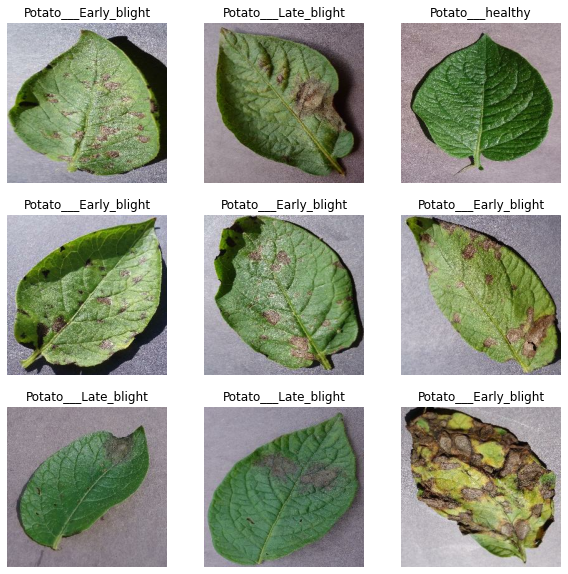

In [30]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis(False)

In [31]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [32]:
train_ds = dataset.take(54)
len(train_ds)

54

In [33]:
rest_ds = dataset.skip(54)
val_size = 0.1
test_size = 0.1

In [35]:
test_size*len(dataset)

6.800000000000001

In [40]:
val_ds = rest_ds.take(6)
test_ds = rest_ds.skip(6)
print(len(val_ds),len(test_ds))

6 8


In [41]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [42]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

TypeError: unsupported operand type(s) for *: 'ShuffleDataset' and 'float'